In [1]:
import requests

# URL of the PDF file
url = "https://www.ikea.com/ch/en/assembly_instructions/kallax-shelving-unit-high-gloss-white__AA-1009448-17-100.pdf"

# Download the PDF
response = requests.get(url)
pdf_filename = "kallax_shelving_unit.pdf"
with open(pdf_filename, "wb") as pdf_file:
    pdf_file.write(response.content)

print(f"Downloaded PDF file: {pdf_filename}")

Downloaded PDF file: kallax_shelving_unit.pdf


In [2]:
!pip install pdf2image


In [6]:
!pwd

/Users/mauroleidi/Desktop/tmp_baselhack


In [5]:
from pdf2image import convert_from_path

# Path to the downloaded PDF
pdf_path = "kallax_shelving_unit.pdf"

# Convert PDF to images
pages = convert_from_path(pdf_path, dpi=300)  # dpi=300 for higher quality

# Save each page as a PNG image
for i, page in enumerate(pages):
    png_filename = f"pngs/page_{i + 1}.png"
    page.save(png_filename, "PNG")
    print(f"Saved {png_filename}")


Saved pngs/page_1.png
Saved pngs/page_2.png
Saved pngs/page_3.png
Saved pngs/page_4.png
Saved pngs/page_5.png
Saved pngs/page_6.png
Saved pngs/page_7.png
Saved pngs/page_8.png
Saved pngs/page_9.png
Saved pngs/page_10.png
Saved pngs/page_11.png
Saved pngs/page_12.png
Saved pngs/page_13.png
Saved pngs/page_14.png
Saved pngs/page_15.png
Saved pngs/page_16.png
Saved pngs/page_17.png
Saved pngs/page_18.png
Saved pngs/page_19.png
Saved pngs/page_20.png
Saved pngs/page_21.png
Saved pngs/page_22.png
Saved pngs/page_23.png
Saved pngs/page_24.png


In [89]:
import requests

# Define the URL of the FastAPI endpoint
url = "http://127.0.0.1:8000/uploadfiles/"

# Prepare the files to upload
files = [
    ('files', open('/Users/mauroleidi/Desktop/tmp_baselhack/pngs/page_8.png', 'rb')),
    ('files', open('/Users/mauroleidi/Desktop/tmp_baselhack/pngs/page_9.png', 'rb'))
]


# Prepare the description as a form field
description = {
    "description": "Test description for images"
}

# Send the POST request with the correct data format
# Use 'data' for form data and 'files' for file uploads
imageswithdescriptions = requests.post(url, files=files)

print(imageswithdescriptions)


<Response [200]>


[{'description': 'Insert two screws into the pre-drilled holes on the edges of the side panels, securing them to the central divider. Make sure to align the panels properly before tightening the screws as indicated by the diagram.',
  'image': ''},
 {'description': 'Position the central panel into the assembly, aligning it with the guide holes. Use a hammer to gently tap the connectors into place. Ensure the panel is snugly fitted and repeat this for the remaining three connectors.',
  'image': ''}]
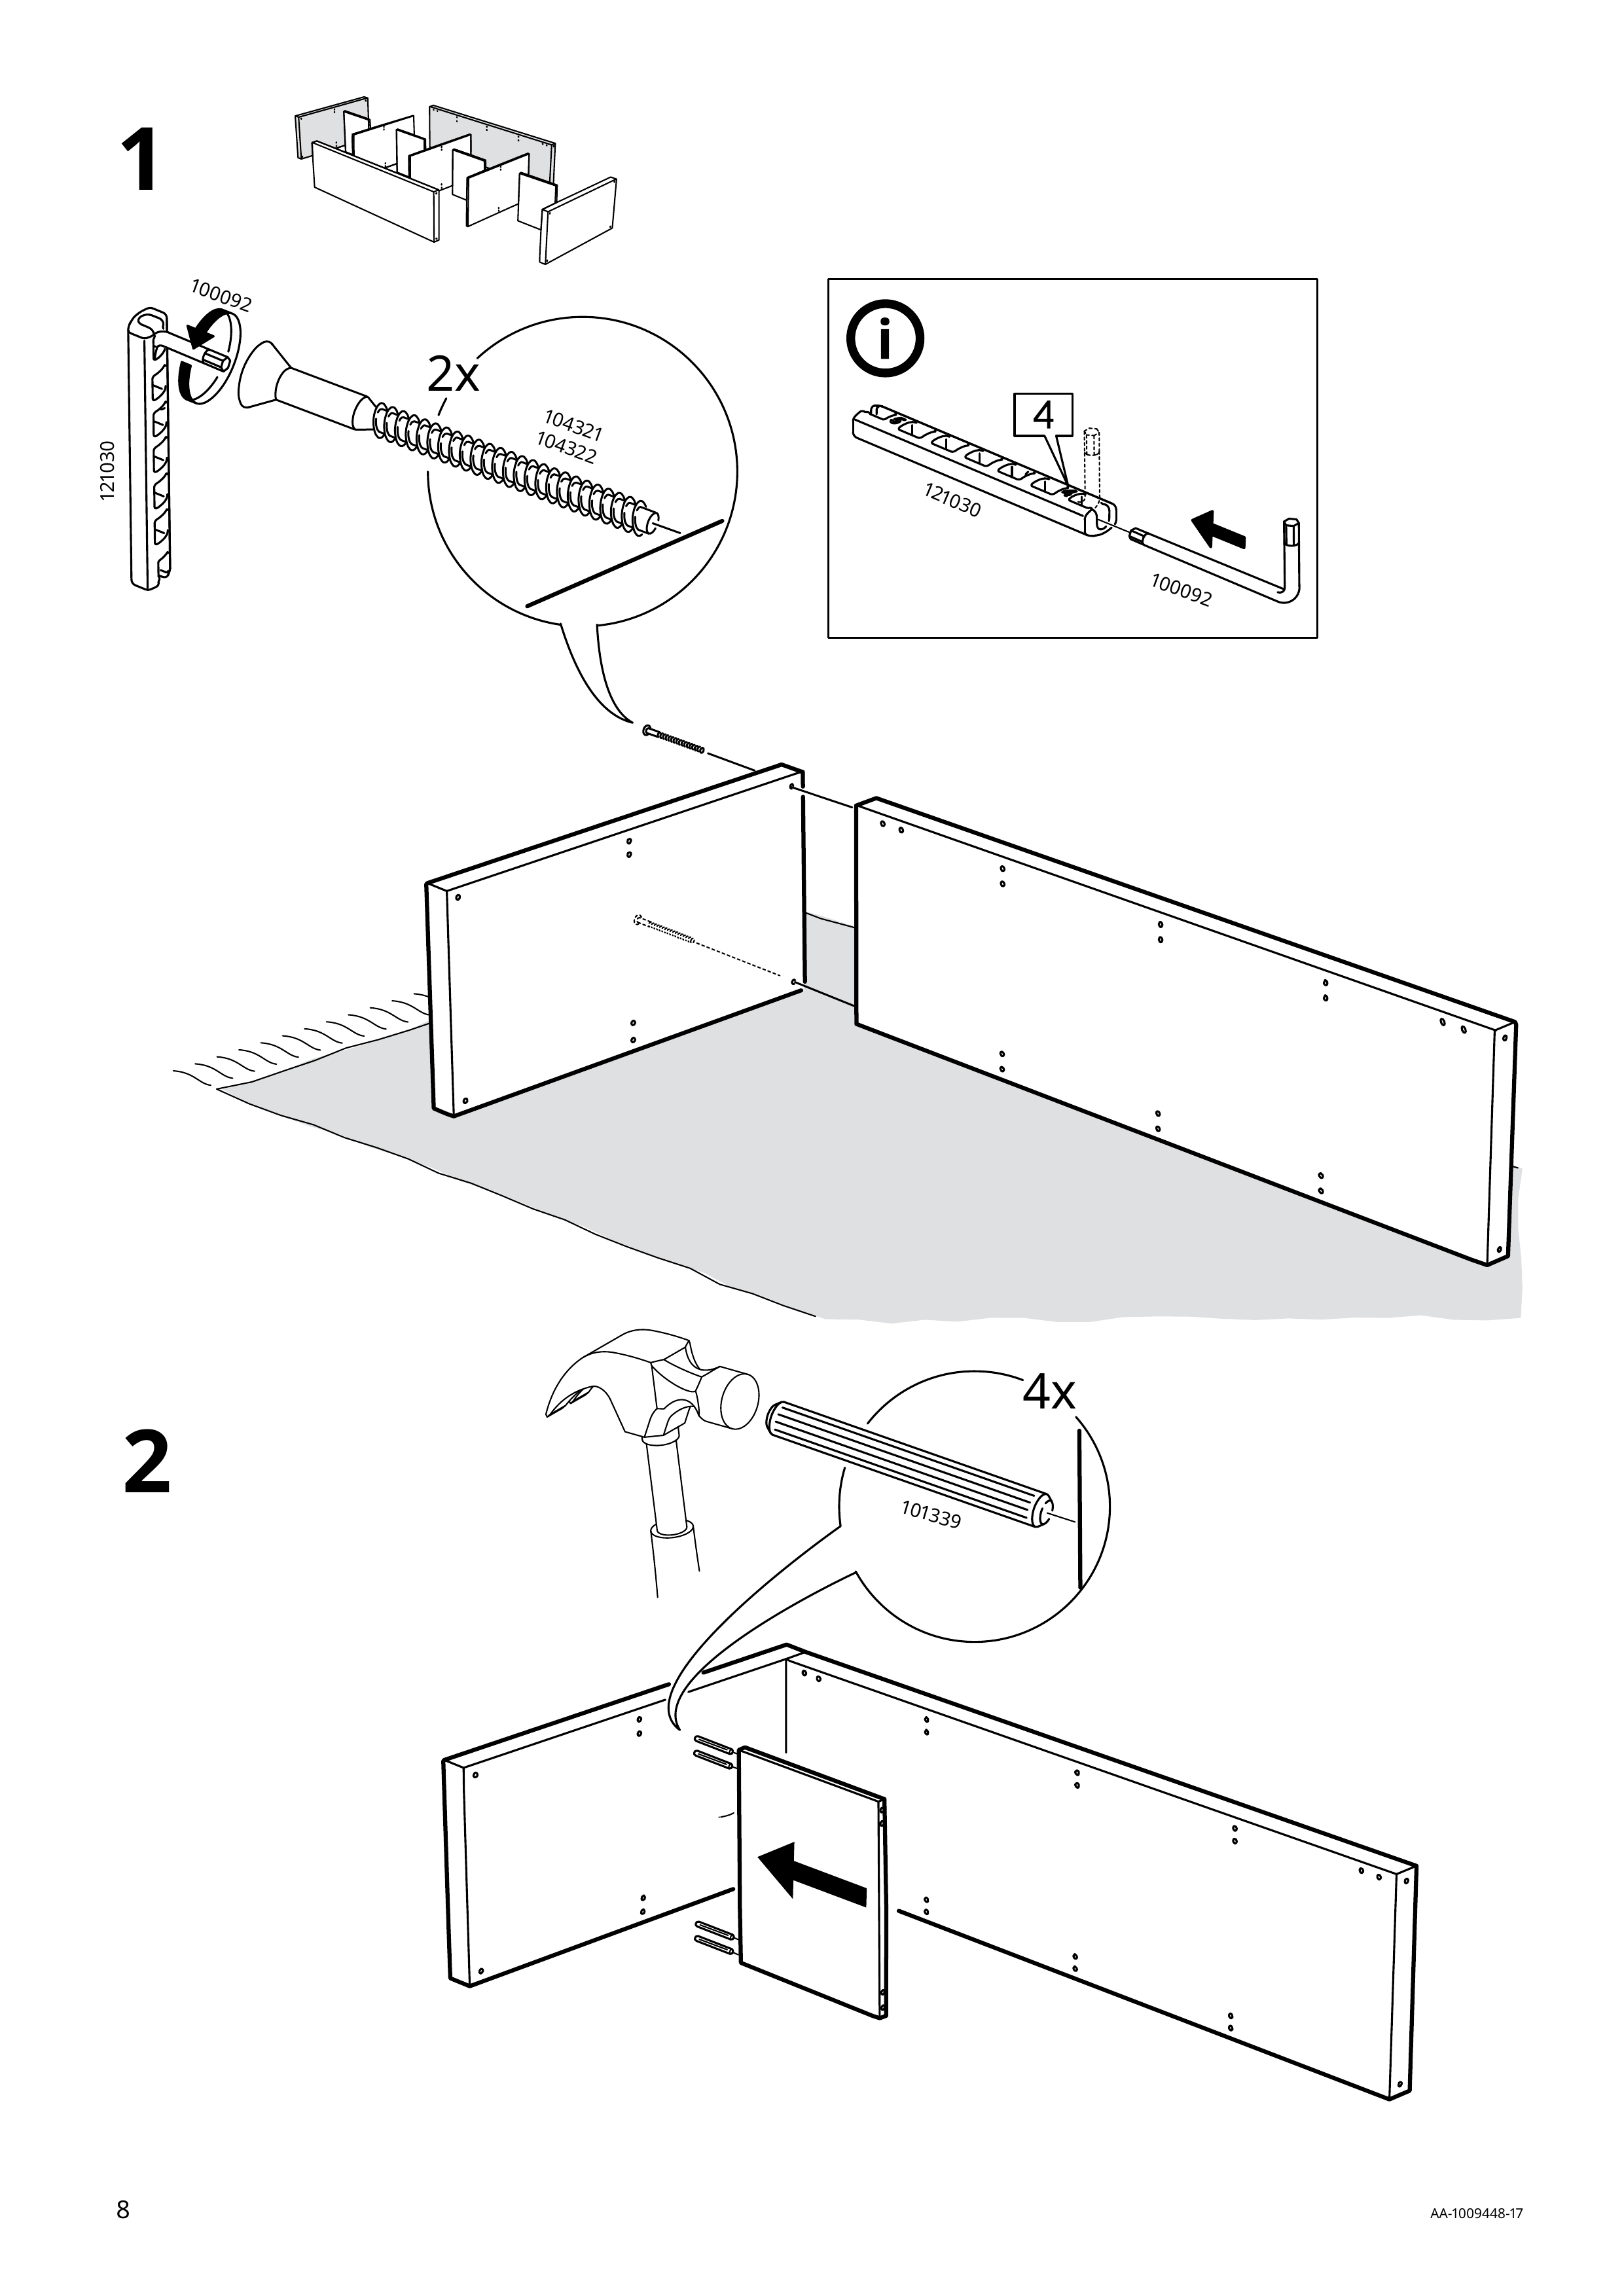
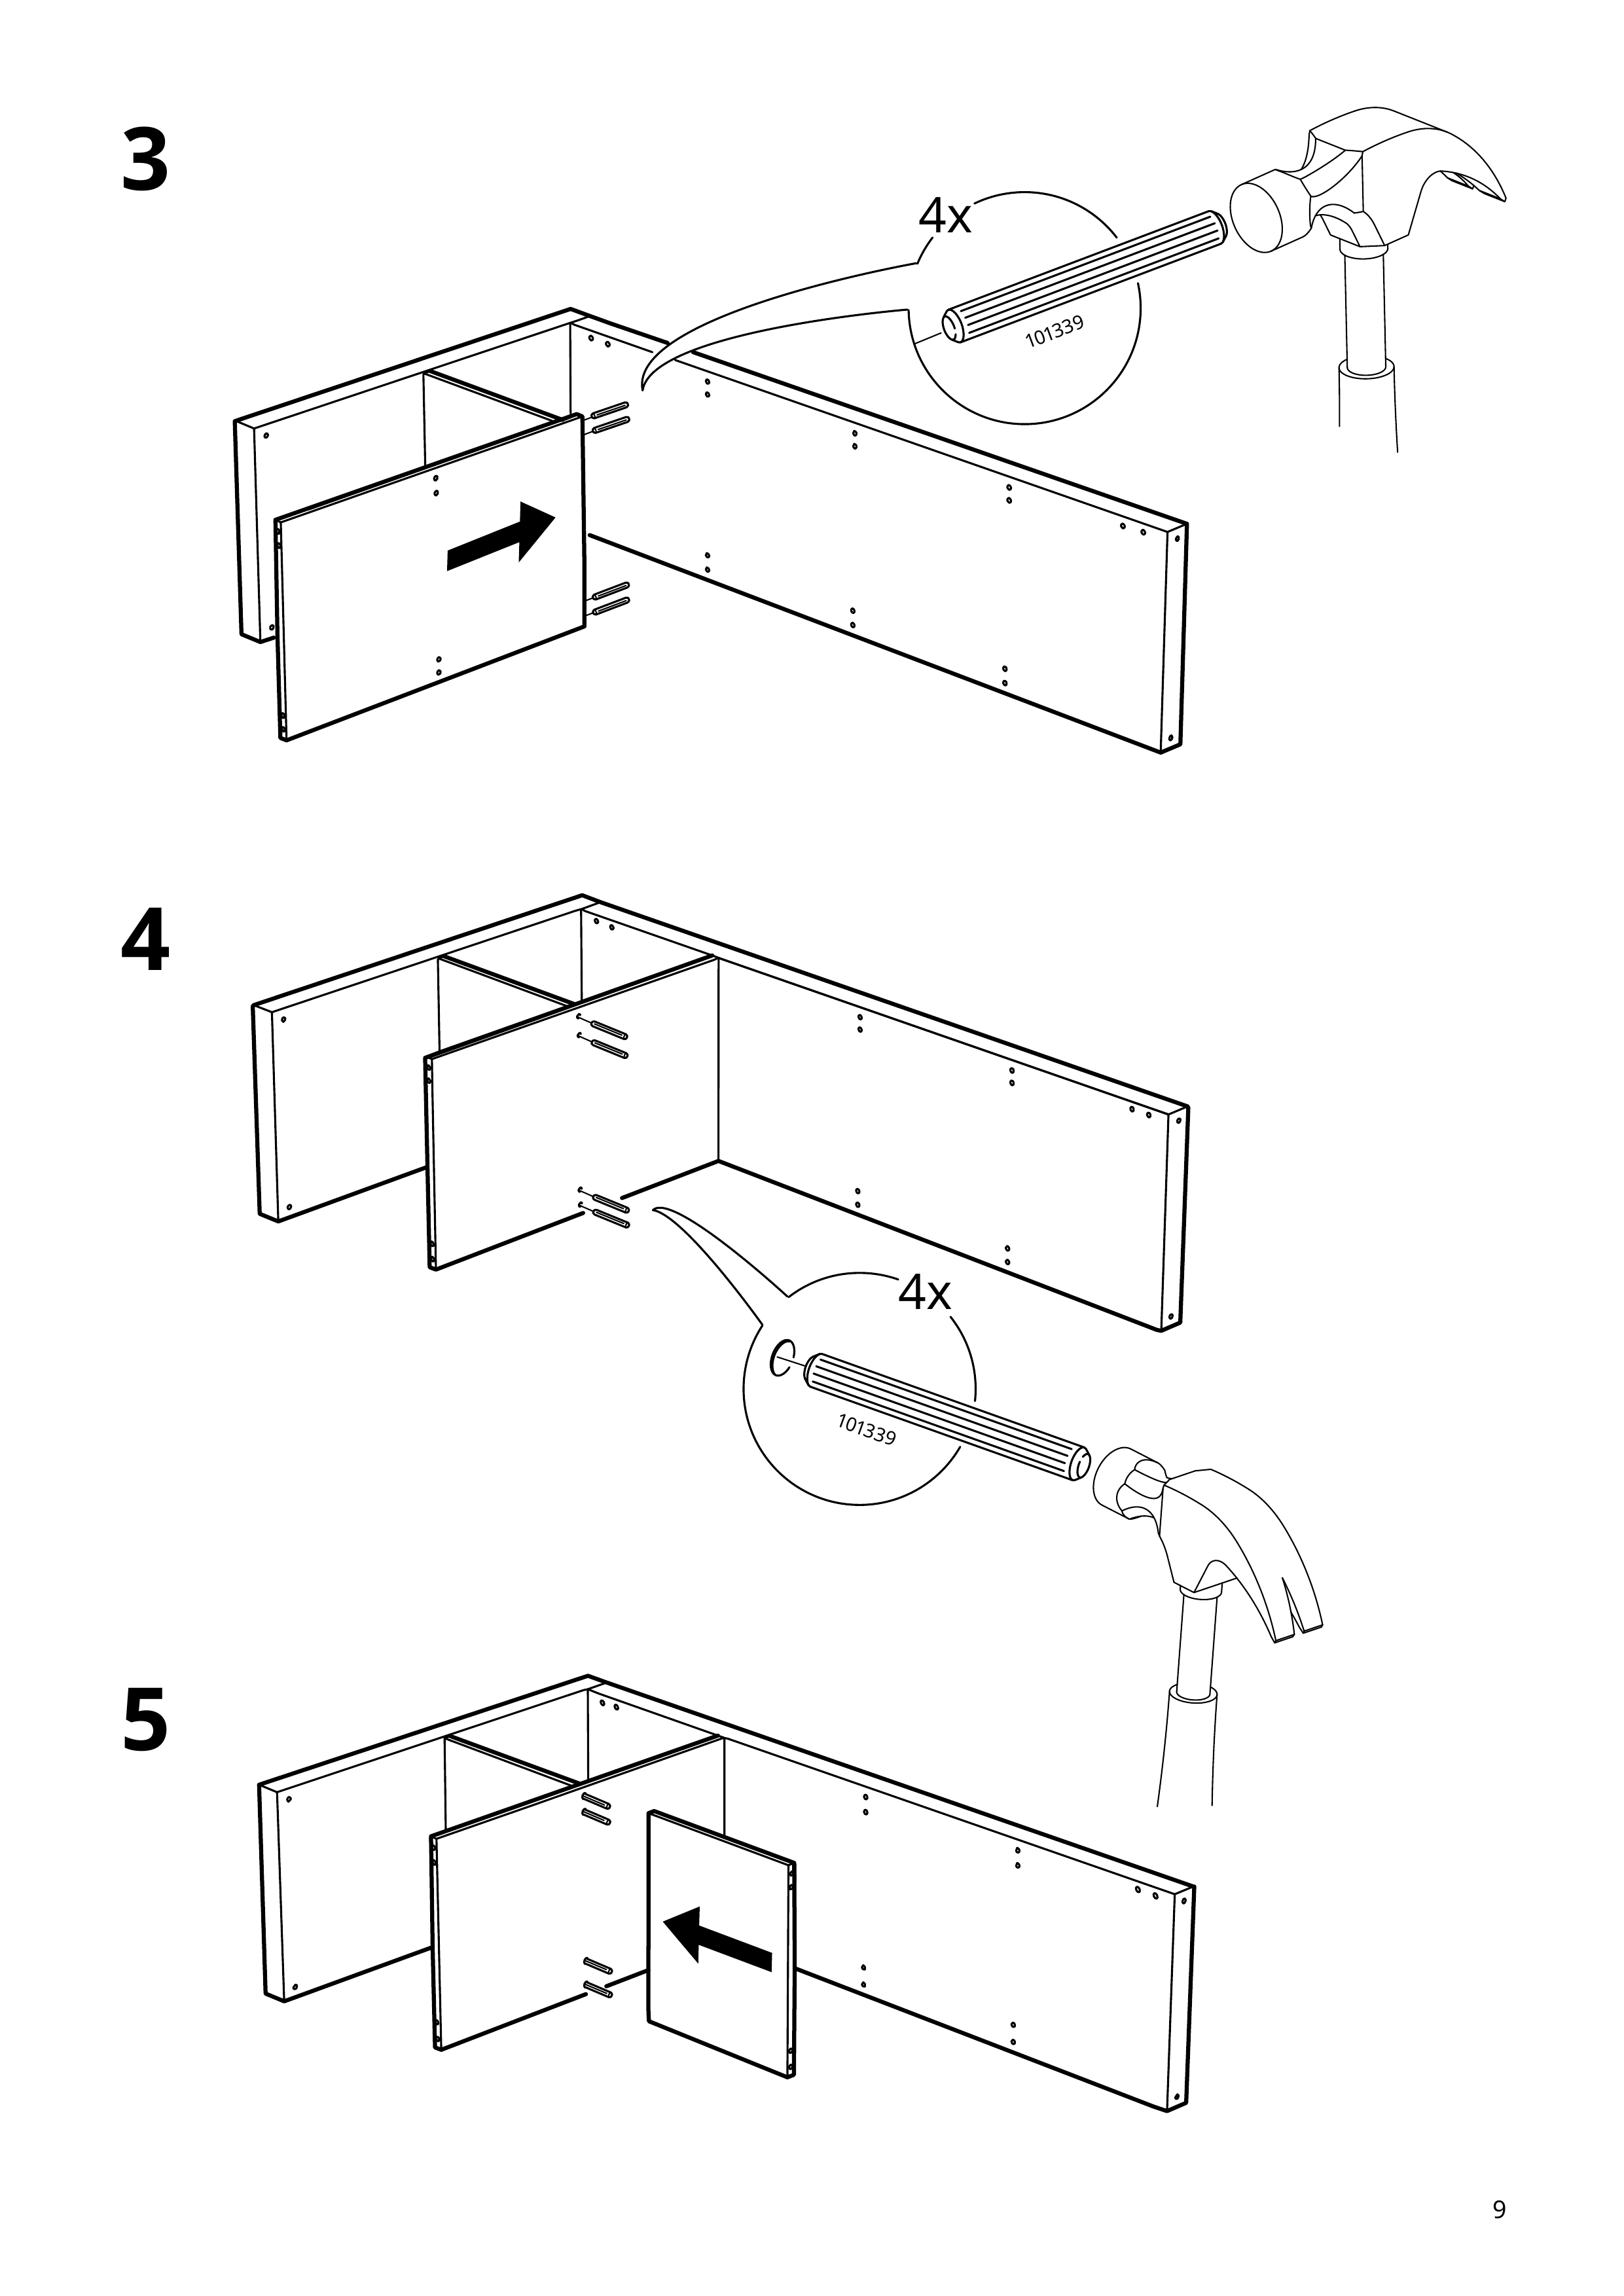

In [90]:
imageswithdescriptions.json()

In [80]:
imageswithdescriptions.json()['choices'][0]['message']['content']

'{"pages_instructions":["Insert the two panels together at the designated sections and secure them using 2 screws at the specified positions. Make sure the screws are tightened properly for stability.","Align the smaller panel with the horizontal sections on the sides and use a hammer to tap in 4 dowels to secure it in place. Ensure the dowels are fully inserted into the designated holes without damaging the surrounding material."]}'

In [84]:
import json

# Your JSON string
json_str = imageswithdescriptions.json()['choices'][0]['message']['content']

# Parse the JSON string
parsed_data = json.loads(json_str)

# Access the list of instructions
instructions = parsed_data["pages_instructions"]

print(instructions)


['Insert the two panels together at the designated sections and secure them using 2 screws at the specified positions. Make sure the screws are tightened properly for stability.', 'Align the smaller panel with the horizontal sections on the sides and use a hammer to tap in 4 dowels to secure it in place. Ensure the dowels are fully inserted into the designated holes without damaging the surrounding material.']


In [82]:
len(instructions)

2

In [70]:
imageswithdescriptions.json()['choices'][0]['message']['content']

'{"pages_instructions":["1. Gather all necessary components, including two panels, screws (2x 104321 and 104322), and the L-shaped connector (100092). Position the panels parallel to each other on a flat surface. \\n2. Using the L-shaped connector, align it with the edges of the panels, ensuring the pre-drilled holes are facing inward. Secure the connector to the panels by inserting the screws into the holes, tightening them firmly. \\n3. Repeat the process on the opposite side with the second set of screws and connector to ensure stability.","1. Place the assembled panels upright, with the edge connector still exposed. \\n2. Take the small panel indicated in the image (to be inserted later) and ensure the connection dowels (4x 101339) are ready for use. \\n3. Position the small panel into the connection dowels, and use a hammer gently to tap the dowels in to secure the panel into place properly. \\n4. Make sure all dowels are fully inserted and the panel is firm in its position."]}'

In [52]:
event.json()['pages_instructions']

['### Step 1: Attach the Side Panels\n1. Position the two side panels upright on a flat surface.\n2. Using a screwdriver, secure each side panel with 2 screws (parts 104321 and 104322) at the designated locations indicated on the panels.\n3. Make sure the panels are aligned straight before tightening the screws to ensure stability.',
 '### Step 2: Insert the Back Panel\n1. Take the back panel and align it with the grooves on the inside of the side panels.\n2. Gently slide the back panel into place until it is fully seated.\n3. Use a hammer to lightly tap the dowels (4x part 101339) into the pre-drilled holes on each side to secure the back panel. Ensure all dowels are firmly in place.']

In [43]:
event.json()['pages_instructions']

['1. **Secure the Panels Together**: \n   - Align the two large panels side by side.\n   - Using a screwdriver, insert 2 screws (104321 and 104322) into the designated holes at one end of the panels. Ensure the screws are fully tightened to secure the structure.\n   - Reference the labeled diagram for proper orientation and positioning of the screws to maintain structural integrity.\n\n2. **Insert the Top Panel**: \n   - Take the smaller panel and align it with the grooves between the two larger panels.\n   - Gently tap it into place using a hammer, ensuring it is seated firmly.\n   - Repeat this step for the four dowels (101339) to secure the top panel in place, creating a stable assembly. \n   - Check that all panels are aligned and flush for a neat finish.']

In [44]:
len(event.json()['pages_instructions'])

1

In [29]:


from PIL import Image

# Replace 'your_image.png' with the path to your PNG file
image_path = '/Users/mauroleidi/Desktop/tmp_baselhack/pngs/page_9.png'

# Open the image file
with Image.open(image_path) as img:
    # Get image dimensions
    width, height = img.size
    print(f"Image dimensions: {width} x {height} pixels")

Image dimensions: 2481 x 3508 pixels
